**Convolutional Neural Network (CNN) for Image Classification**

Packages for dealing with images:
1. [OpenCV](https://pypi.org/project/opencv-python/)
2. [Matplotlib](https://matplotlib.org/)
3. [Pillow](https://pillow.readthedocs.io/en/stable/)
3. [scikit-image](https://scikit-image.org/)
4. [Tensorflow](https://www.tensorflow.org/)

In [1]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## Load images

Anzahl der Unterverzeichnisse: 5
Shape of images array: (250, 384, 512, 3)


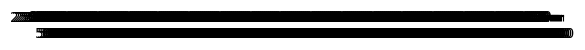

In [3]:
def get_filenames(filepath):
    # Lade alle .jpg-Dateien rekursiv aus dem Verzeichnis und seinen Unterordnern
    imagefiles = [f for f in glob.glob(filepath + '/**/*.jpg', recursive=True)]  # '**/' für rekursive Suche
    return imagefiles 

def read_images(filenames, height=None, width=None):
    images = [Image.open(filename) for filename in filenames]
    if (not height is None) and (not width is None):
        images = [img.resize((width, height)) for img in images]
    return images

def images_to_array(images):
    return np.asarray([np.asarray(img) for img in images])

path = r'C:\Users\Thore\Desktop\KI\ki\Garbage classification'
num_dirs = sum(os.path.isdir(os.path.join(path, i)) for i in os.listdir(path))
print(f"Anzahl der Unterverzeichnisse: {num_dirs}")

# Get file names
image_names = get_filenames(path)

# Load images
input_shape = {
    "height": 384,
    "width": 512,
    "channels": 3
}
images = read_images(image_names, height=input_shape["height"], width=input_shape["width"])

# Convert images to array
aimages = images_to_array(images)
print(f'Shape of images array: {aimages.shape}')

# Plot images array
#display(Image.fromarray(aimages[11]))
fig = plt.figure(figsize=(8, 8))
rows, columns = num_dirs, 50
for i in range(aimages.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages[i, ...])
plt.show()

## Create Labels

In [4]:
# Label list
def flatten_lst(lst):
    return [item for items in lst for item in items]

# def get_folder_names(filepath):
#     # Holen der Namen aller Ordner im angegebenen Verzeichnis
#     folder_names = [folder for folder in os.listdir(filepath) if os.path.isdir(os.path.join(filepath, folder))]
#     return folder_names

# folder_names = get_folder_names(filepath)

categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic']
labels = flatten_lst([[label] * 300 for label in categories])
print(labels)
# One-hot encoding of the labels
encoder = OneHotEncoder(categories=[categories], sparse_output=False)
y = encoder.fit_transform(np.array(labels).reshape(-1,1))
y

['cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard', 'cardboard'

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

## Build model

In [ ]:
# Hyperparameters
epochs = 60
batch_size = 32

# CNN model
inputs = Input(shape=(input_shape.values()))
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Flatten()(hidden)
hidden = Dense(units=256, activation='relu')(hidden)
hidden = Dropout(rate=0.25)(hidden)
output = Dense(units=y.shape[-1], activation='softmax')(hidden)
cnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')

# Configuration of the training process
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Fit model
history = cnn.fit(x=aimages, y=y, epochs=epochs, batch_size=1)

## Plot model learning curve

In [ ]:
def minmax(a):
    a = np.asarray(a)
    a = (a - a.min()) / (a.max() - a.min())
    return a

plt.plot(range(1, epochs+1), minmax(history.history['loss']))
plt.plot(range(1, epochs+1), minmax(history.history['accuracy']))
plt.title('Model learning curves')
plt.xlabel('epochs')
plt.gca().legend(('loss', 'accuracy'))
plt.show()

## Predictions

In [44]:
# Metric functions
def accuracy(actuals, preds):
    actuals, preds = np.asarray(actuals), np.asarray(preds)
    return np.mean(np.ravel(actuals) == np.ravel(preds))

In [ ]:
yhat = cnn.predict(aimages)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]

print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

## Transfer Learning

Transfer learning is the reuse of an pre-trained neural network for similar, related tasks. An overview of pre-trained convolutional neural networks in Tensorflow can be found on https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [ ]:
from tensorflow.keras.applications import VGG16

# Images should be in specified input shape for pre-trained model
pt_input_shape = {'height': 224, 'width': 224, 'channels': 3}
pt_images = images_to_array(read_images(image_names, height=pt_input_shape['height'], width=pt_input_shape['width']))

# Load pre-configured and pre-trained CNN without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()))
# Mark loaded layers as not trainable (freeze layers)
for layer in base_model.layers:
    layer.trainable = False

# Place new top layer on base model
output = Flatten()(base_model.layers[-1].output)
output = Dense(units=1024, activation='relu')(output)
output = Dense(units=y.shape[-1], activation='softmax')(output)

# Define the entire new model
pt_cnn = Model(inputs=base_model.inputs, outputs=output)

# Train the new model
epochs = 60
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

In [ ]:
# Alternative way
pt_cnn = tf.keras.Sequential()

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()), classes=y.shape[-1])
for layer in base_model.layers:
    layer.trainable = False

pt_cnn.add(base_model)
pt_cnn.add(Flatten())
pt_cnn.add(Dense(units = 1024, activation='relu'))
pt_cnn.add(Dense(units = y.shape[-1], activation='softmax'))

epochs = 60
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

In [ ]:
plt.plot(pt_history.history['accuracy'])
plt.axis(ymin=0.3, ymax = 1)
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

In [ ]:
# Other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(labels, yhat)
pre = precision_score(labels, yhat, average=None)
rec = recall_score(labels, yhat, average=None)
f1 = f1_score(labels, yhat, average=None)
print(f'Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1-Score: {f1}')